# EDA 

In [1]:
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.pandas.set_option('display.max_columns',None)
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",sep=',',skiprows=1)

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [10]:
col=list(map(str.strip,[x for x in df.columns]))
df.columns=col

In [11]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [14]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [15]:
df.shape

(246, 14)

In [17]:
df[df['Temperature'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df=df[~df['Temperature'].isnull()]
df=df[df['Temperature']!='Temperature']

In [19]:
df.shape

(244, 14)

In [20]:
date_features=['day','month','year']
for i in date_features:
    print("The feaures {} has ".format(i),df[i].nunique(), "unique categories and values are ",df[i].unique() )

The feaures day has  31 unique categories and values are  ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31']
The feaures month has  4 unique categories and values are  ['06' '07' '08' '09']
The feaures year has  1 unique categories and values are  ['2012']


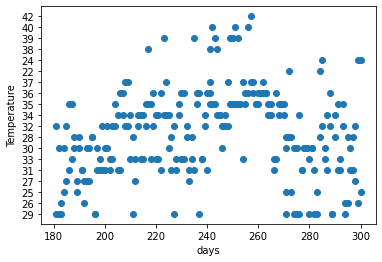

In [21]:
#for Regreesion probelm
data=df.copy()
data['day']=pd.to_numeric(data['day'])
data['month']=pd.to_numeric(data['month'])

data['days']=data['day']+30*data['month']

plt.scatter(data['days'],data['Temperature'])
plt.xlabel('days')
plt.ylabel('Temperature')
plt.show()

In [22]:
data['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [25]:
df=df[~df['Classes'].isnull()]
df=df[df['Classes']!='Classes']

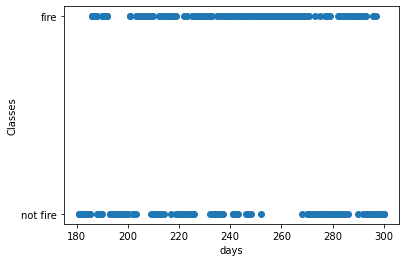

In [26]:
#for classification probelm
data=df.copy()

data['day']=pd.to_numeric(data['day'])
data['month']=pd.to_numeric(data['month'])

data['days']=data['day']+30*data['month']
data['Classes']=data['Classes'].apply(lambda x : str(x).strip())

plt.scatter(data['days'],data['Classes'])
plt.xlabel('days')
plt.ylabel('Classes')
plt.show()

In [27]:
# Find out all numeric features

num_features=[x for x in df.columns if x not in ['day','month','year','Classes']]
df[num_features]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...
241,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5
242,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0
243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [28]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<15 ]
print("Discrete Variables Count: {}".format(len(discrete_features)))

Discrete Variables Count: 0


In [29]:
df.shape

(243, 14)

In [31]:
#so here we can make conclusion all the numeric features are continous in nature because we dont have any discrete features
# num_features=cont_features+discrete_features
cont_features=num_features

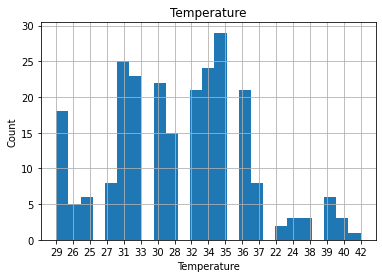

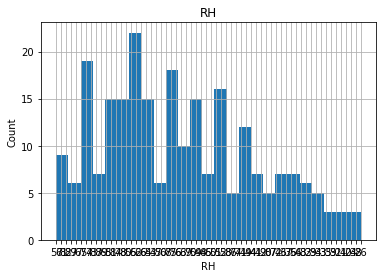

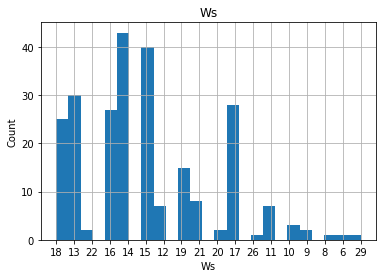

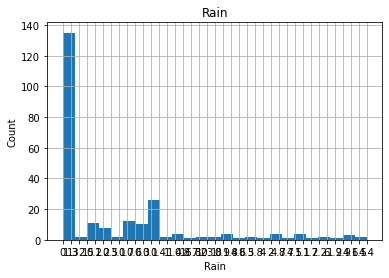

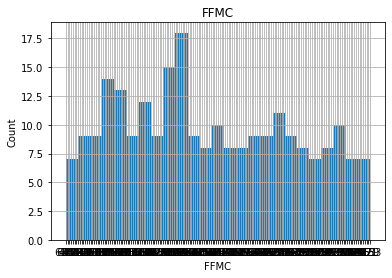

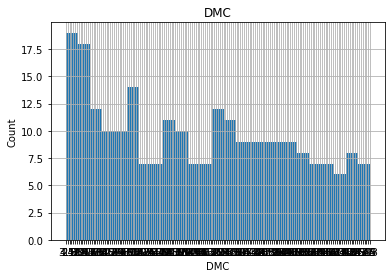

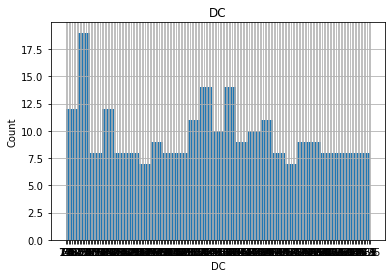

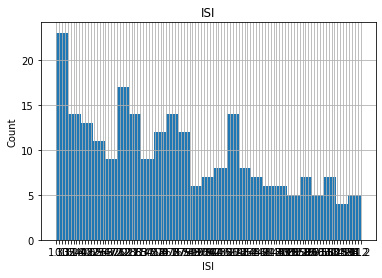

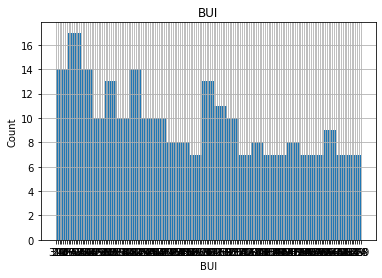

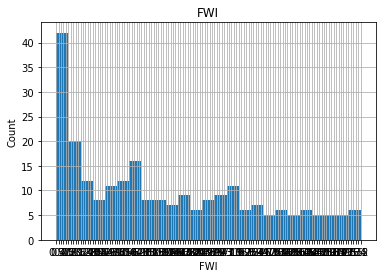

In [32]:
#Analize the contious feature distribution

for feature in cont_features:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [33]:
#so I observed all fetaures follow Gaussion Normal Distrution that woould be good for ML model.
# there are 2 features rain and FWI that is right skewed distribution

In [34]:
# lets tranform logrithmic and alayzie the destribution
data=df.copy()
for feature in cont_features:
    data[feature]=pd.to_numeric(data[feature])
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
    

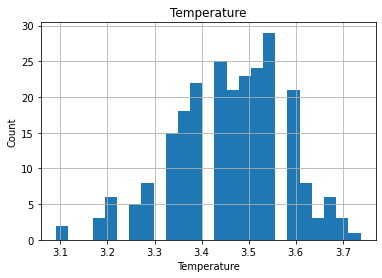

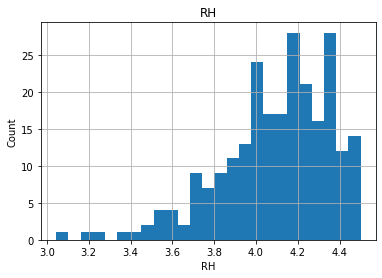

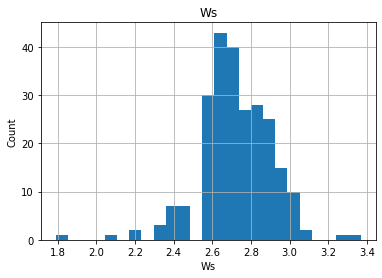

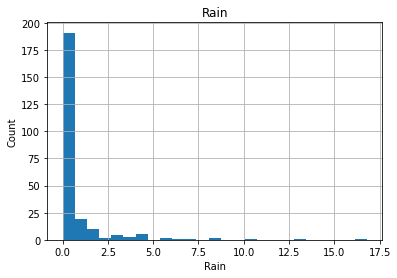

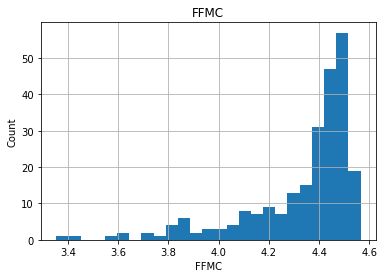

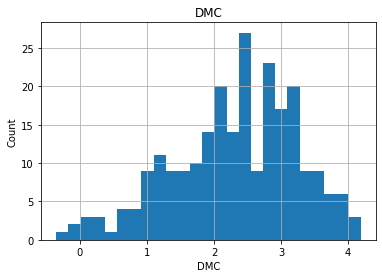

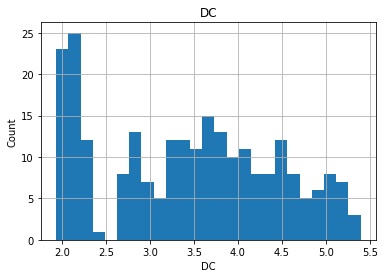

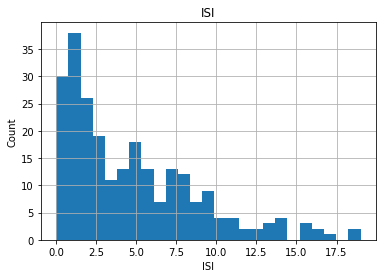

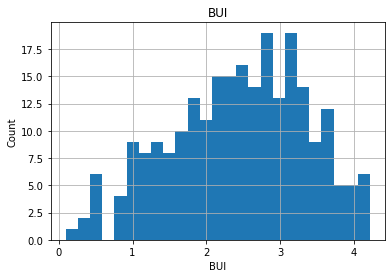

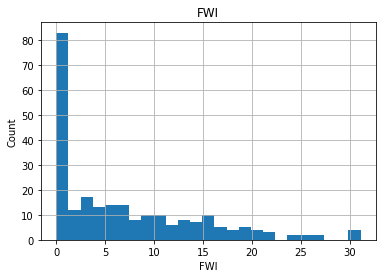

In [35]:
for feature in cont_features:
    
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [36]:
#Check variance of continuous features
data=df.copy()
for feature in cont_features:
    data[feature]=pd.to_numeric(data[feature])
    print("the variance of df {} is ".format(feature),statistics.variance(data[feature]))
      

the variance of df Temperature is  13.16267047580179
the variance of df RH is  219.87433255110022
the variance of df Ws is  7.903887358432813
the variance of df Rain is  4.012837465564739
the variance of df FFMC is  205.91220419685067
the variance of df DMC is  153.5874342754141
the variance of df DC is  2272.0099938781755
the variance of df ISI is  17.257658742305207
the variance of df BUI is  202.44796789443254
the variance of df FWI is  55.362048090330916


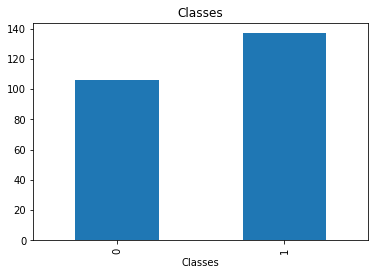

In [40]:
# Checking if we have Classes have out put feature ,then just check balance/imblanced of data  for classification probelems

data=df.copy()
data['Classes']=data['Classes'].apply(lambda x : str(x).strip())
data['Classes']=data['Classes'].map({"not fire":0,"fire":1})
data.groupby(['Classes'])['Classes'].count().plot.bar()
plt.title('Classes')
plt.show()

In [42]:

df[cont_features]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...
241,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5
242,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0
243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [43]:
df['Classes']

0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
241         fire   
242     not fire   
243     not fire   
244     not fire   
245    not fire    
Name: Classes, Length: 243, dtype: object

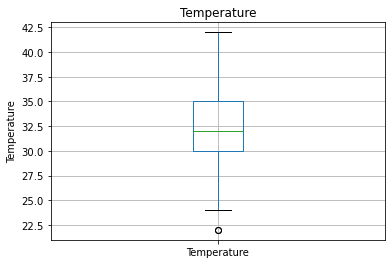

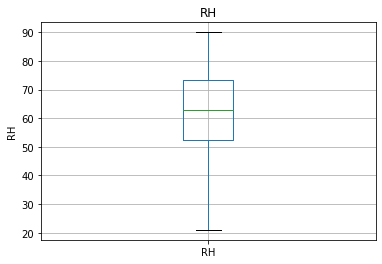

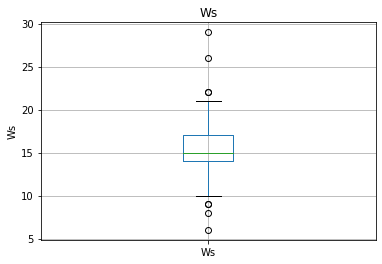

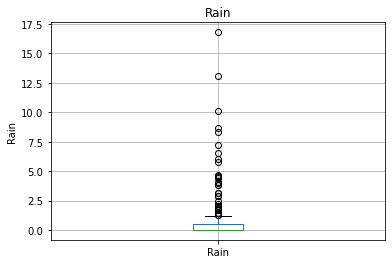

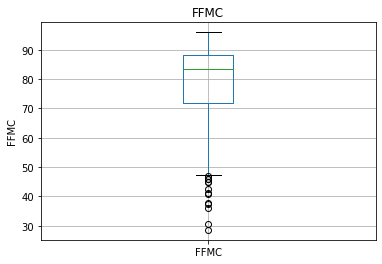

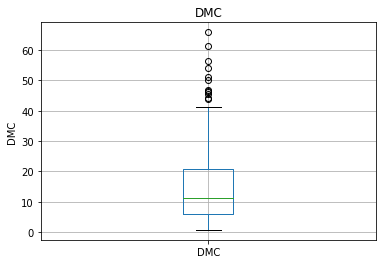

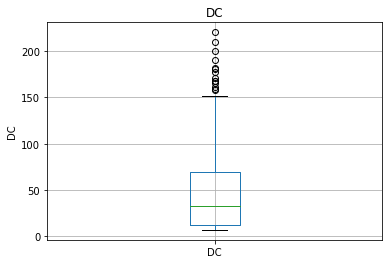

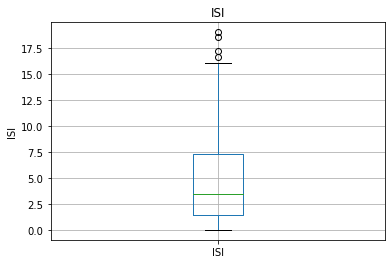

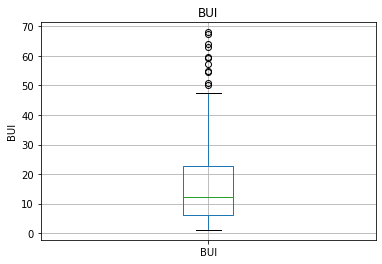

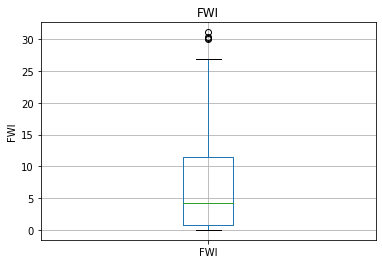

In [44]:

data=df.copy()
for feature in cont_features:
    data[feature]=pd.to_numeric(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [45]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [46]:
df['day']=pd.to_numeric(df['day'])
df['month']=pd.to_numeric(df['month'])
df['days']=df['day']+30*df['month']

df=df.drop(['day', 'month','year'], axis = 1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,days
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,181
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,182
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,183
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,184
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,185


In [47]:

df['Classes']=df['Classes'].apply(lambda x : str(x).strip())
df['Classes']=df['Classes'].map({"not fire":0,"fire":1})
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,days
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,181
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,182
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,183
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,184
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,185


In [48]:
#There were twop rows having missing values that was removed in EDA part
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
days           0
dtype: int64

In [49]:
# convert all features into numeric 
for i in  df.columns:
    df[i]=pd.to_numeric(df[i])

In [50]:
df.head().to_csv("Test1.csv")

In [51]:

X = df.iloc[:, 1:]
y = df.iloc[:, 0:1]

In [52]:
X.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,days
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,181
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,182
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,183
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,184
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,185


Splitting the dataset into the Training set and Test set

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Feature Scalling

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

\
# Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression
ln_regressor=LinearRegression()
ln_regressor.fit(X_train,y_train)

LinearRegression()

In [57]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(ln_regressor,X_train,y_train,cv=5)

In [58]:
y_pred=ln_regressor.predict(X_test)

In [59]:
y_test.dtypes

Temperature    int64
dtype: object

C:\Users\Anwesh Saho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

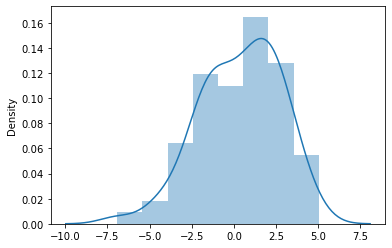

In [60]:
sns.distplot(y_test-y_pred)

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.46515634901489544

In [62]:
import pickle
# open a file, where you ant to store the data
#file = open('regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(ln_regressor, open('regression_model.pkl', 'wb'))

# Ridge Regreesion

In [63]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [65]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [66]:
y_pred=ridge_regressor.predict(X_test)

C:\Users\Anwesh Saho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

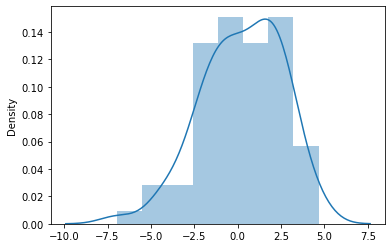

In [67]:
sns.distplot(y_test-y_pred)

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.49567000754664314

# Lasso Regression

In [69]:
from sklearn.linear_model import Lasso

In [70]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)


C:\Users\Anwesh Saho\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 378.0534245258725, tolerance: 0.18430588235294118
  model = cd_fast.enet_coordinate_descent(
C:\Users\Anwesh Saho\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 412.84216262564314, tolerance: 0.19647573529411766
  model = cd_fast.enet_coordinate_descent(
C:\Users\Anwesh Saho\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 343.1184904037785, tolerance: 0.19946397058823528
  model = cd_fast.enet_coordinate_descent(
C:\Users\Anwesh Saho\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_de

{'alpha': 0.01}
-6.23979604693589


In [71]:
y_pred=lasso_regressor.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4901989058063029

# SVR# 

In [73]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
sv_regressor = SVR()
## Hyper Parameter Optimization

params={
 "kernel"    : ["linear", "poly", "rbf", "sigmoid"] ,
 "degree"        : [ 1,2,3, 4, 5, 6],
 "gamma" : ["scale","auto"]
    }
print(params)
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [1, 2, 3, 4, 5, 6], 'gamma': ['scale', 'auto']}
random_search=GridSearchCV(sv_regressor,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train,y_train)

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [1, 2, 3, 4, 5, 6], 'gamma': ['scale', 'auto']}
Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\Anwesh Saho\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=3)

In [74]:
random_search.best_params_

{'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}

In [76]:
random_search.best_score_

-6.234039674748662

C:\Users\Anwesh Saho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

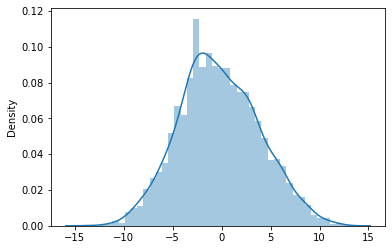

In [77]:
y_pred=random_search.predict(X_test)
sns.distplot(y_pred-y_test.to_numpy())

In [79]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4989999821922002

# Decesion Tree Regressor

In [81]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV
## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)
random_search.fit(X_train,y_train)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

C:\Users\Anwesh Saho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

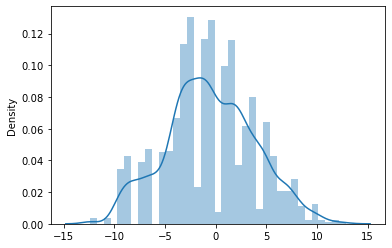

In [82]:
random_search.best_params_
{'max_depth': 3,
 'max_features': 'log2',
 'max_leaf_nodes': 70,
 'min_samples_leaf': 3,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}
random_search.best_score_
-6.371178071564152
y_pred=random_search.predict(X_test)
sns.distplot(y_pred-y_test.to_numpy())

In [83]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
0.5365599393910909
r2_score(y_train,random_search.predict(X_train))

0.5476946779716604